### ALY6080 Integrated Experiential Learning
# **Policy Prediction for Portland Citizens**

### Prepared by: Sophie Tong
                            
### Presented to: Professor  Chinthaka Pathum Dinesh
#### Date of submission: Dec 14, 2023


#### Data set: https://northeastern.instructure.com/courses/159887/files/23267393/download?download_frd=1


#  Project Overview


Dataset: The project utilizes two datasets—Portland citizen demographic data and a text dataset comprising 389 PDF documents.

Objectives and Values:
1. Objective: Predict the most advantageous policies for individuals based on demographic attributes and text data.
2. Value: Leverage extensive data resources for analyzing and identifying impactful public policies tailored to individuals' needs and interactions with public services.

Methodology:
1. Data Collection: Gather Portland citizen demographic data and text documents.
2. Preprocessing: Clean and preprocess the text data for analysis.
3. Text Mining: Utilize techniques such as TF-IDF, Named Entity Recognition (NER), and topic modeling to extract insights from the text dataset.
4. Analysis: Apply methods like K-Means clustering and LDA modeling to analyze the data and predict optimal policies.
5. Evaluation: Assess the accuracy and performance of the prediction models.


Findings and Recommendations:
1. Keyword Optimization: Enhance prediction accuracy by optimizing keywords used in interest classification.
2. Model Refinement: Continuously refine the models based on feedback from domain experts to improve recommendation accuracy.
3. Further Optimization: Despite efforts,the project faces challenges in accurately predicting optimal policies and constructing a targeted recommendation system. Explore additional techniques and strategies to enhance the precision of policy predictions and recommendation systems.




# Portland Citizen Data Analysis

## Get data and libraries ready

In [ ]:
#import all libraries

#import all libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import t
from google.colab import drive

In [ ]:
df=pd.read_csv('Portlanddem.csv')

## Data Overview and cleaning

In [ ]:
#preview top 5 rows
df.head(5)

,Person,Address,AGE,Interest,Enviornmental,Infastructure,Education,Zoning,Safety
0,1,West End,25,Enviroment,5,2.0,3.0,1.0,3.0
1,2,Parkside,49,Saftey,1,1.0,5.0,2.0,4.0
2,3,East Bayside,26,Education,1,3.0,5.0,2.0,2.0
3,4,East Bayside,24,Safety,3,2.0,5.0,3.0,5.0
4,5,East End,36,Safety,1,1.0,3.0,4.0,5.0


In [ ]:
#preview table structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Person          500 non-null    int64  
 1   Address         500 non-null    object 
 2   AGE             500 non-null    int64  
 3   Interest        500 non-null    object 
 4   Enviornmental   500 non-null    int64  
 5   Infastructure   499 non-null    float64
 6   Education       499 non-null    float64
 7   Zoning          499 non-null    float64
 8   Safety          499 non-null    float64
dtypes: float64(4), int64(3), object(2)
memory usage: 35.3+ KB


In [ ]:
#check missing value
df.isnull().sum()

Person            0
Address           0
AGE               0
Interest          0
Enviornmental     0
Infastructure     1
Education         1
Zoning            1
Safety            1
dtype: int64

In [ ]:
# Replace missing values with the mean of their respective columns
df1 = df.fillna(df.mean(numeric_only=True))
#check columns remain, confirm 'person' removed
df1.columns

Index(['Person', 'Address', 'AGE', 'Interest ', 'Enviornmental',
       'Infastructure ', 'Education', 'Zoning', 'Safety '],
      dtype='object')

In [ ]:
# List of columns to drop
columns_to_drop = [ 'Enviornmental','Infastructure ', 'Education', 'Zoning', 'Safety ']

# Drop the specified columns from df1
df1 = df1.drop(columns=columns_to_drop)

# Display the updated DataFrame
print(df1)

     Person       Address  AGE       Interest 
0         1      West End   25     Enviroment 
1         2      Parkside   49        Saftey  
2         3  East Bayside   26       Education
3         4  East Bayside   24          Safety
4         5      East End   36          Safety
..      ...           ...  ...             ...
495     496     Back Cove   48       Education
496     497  East Bayside   36          Zoning
497     498     Back Cove   41          Zoning
498     499       Deering   26  Infrastructure
499     500  East Bayside   32       Education

[500 rows x 4 columns]


In [ ]:
df1['Interest '].unique()

array(['Enviroment ', 'Saftey  ', 'Education', 'Safety', 'Infrastructure',
       'Zoning', 'Environmental'], dtype=object)

In [ ]:
# correct the wrong words in the interest value to align with the column
df1 = df1.replace('Saftey ', 'Safety', regex=True)
df1 = df1.replace('Safety ', 'Safety', regex=True)
df1 = df1.replace('Enviroment ', 'Environmental', regex=True)
df1 = df1.replace('Environmental ', 'Environmental', regex=True)
# Rename the column 'Interest  ' to 'Interest'
df1 = df1.rename(columns={'Interest ': 'Interest'})
df1['Interest'].unique()

array(['Environmental', 'Safety', 'Education', 'Infrastructure', 'Zoning'],
      dtype=object)

In [ ]:
# Recheck the column name
df1.columns

Index(['Person', 'Address', 'AGE', 'Interest'], dtype='object')

In [ ]:
#summary stats of new dataset
df1.describe(include='all')

,Person,Address,AGE,Interest
count,500.000000,500,500.000000,500
unique,NaN,10,NaN,5
top,NaN,Munjoy Hill,NaN,Safety
freq,NaN,61,NaN,105
mean,250.500000,NaN,37.306000,NaN
std,144.481833,NaN,11.299723,NaN
min,1.000000,NaN,18.000000,NaN
25%,125.750000,NaN,28.000000,NaN
50%,250.500000,NaN,36.500000,NaN
75%,375.250000,NaN,47.000000,NaN


## EDA of Portland Citizen Dataset

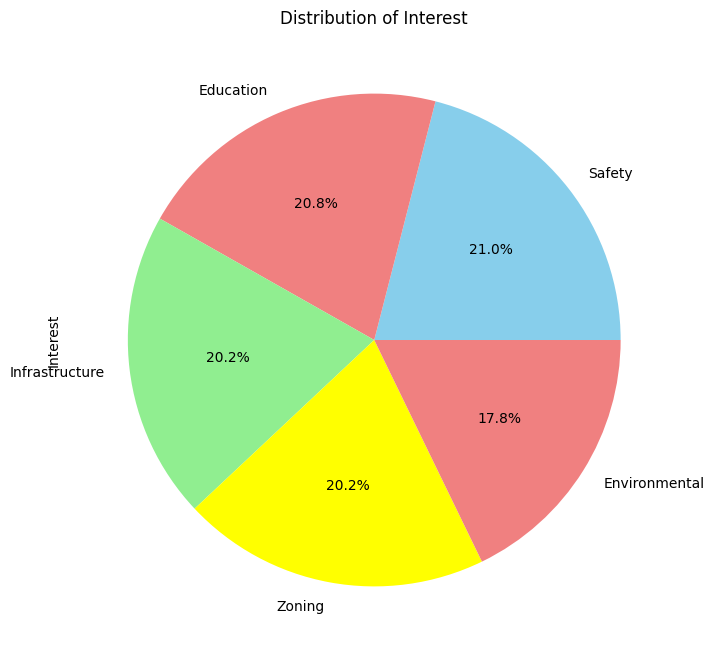

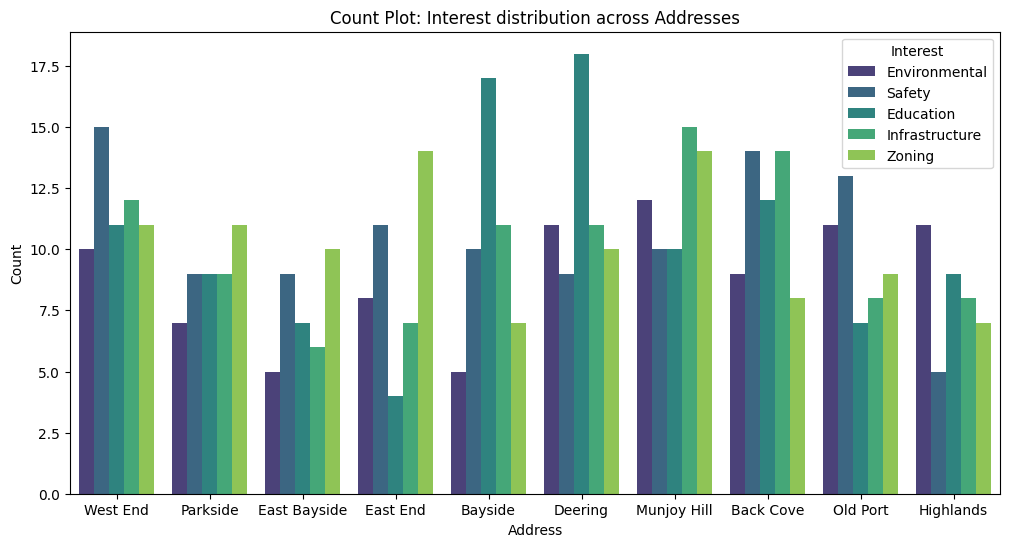

<Figure size 640x480 with 0 Axes>

In [ ]:
# Calculate the distribution of 'Interest'
interest_distribution = df1['Interest'].value_counts()

# Calculate the distribution of 'Address'
address_distribution = df1['Address'].value_counts()

# Plot the distribution of 'Interest' as a pie chart
plt.figure(figsize=(8, 8))
interest_distribution.plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'lightcoral', 'lightgreen', 'yellow','lightcoral'])
plt.title('Distribution of Interest')

# Plot a count plot for 'Interest' and 'Address'
plt.figure(figsize=(12, 6))
sns.countplot(x='Address', hue='Interest', data=df1, palette='viridis')
plt.title('Count Plot: Interest distribution across Addresses')
plt.xlabel('Address')
plt.ylabel('Count')
plt.show()

# Show the plots
plt.tight_layout()
plt.show()

# Text Data Analysis



## 1.Get the libraries and Read Data

In [ ]:
from google.colab import drive

In [ ]:
pip install PyPDF2

In [ ]:
# Importing necessary library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk # natural language toolkit
import os
import nltk.corpus
import requests
import io
from PyPDF2 import PdfReader
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="PyPDF2")

import nltk
from nltk.corpus import stopwords
nltk.download('punkt')
import string
from nltk.probability import FreqDist
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer

# importing word_tokenize from nltk
from nltk.tokenize import word_tokenize  # Passing the string text into word tokenize for breaking the sentences
from nltk.tokenize import sent_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
# Read the CSV file
df2 = pd.read_csv('Portlandtext.csv')

In [ ]:
df2.head()

,Classification Number,Type,Description,Link,Passage Date,Effective Date,Issue Category,Category Types
0,Order 1-21-22 (PDF),Order,Order Granting a Thames Street Extension Licen...,https://content.civicplus.com/api/assets/95133...,2021-07-19,2021-07-29,NaN,Enviornmental
1,Order 2-21-22 (PDF),Order,Order Accepting the Public Art Committee Fisca...,https://content.civicplus.com/api/assets/220d1...,2021-07-19,2021-07-29,NaN,Infastructure
2,Order 3-21-22 (PDF),Order,Order Granting Municipal Officers’ Approval of...,https://content.civicplus.com/api/assets/84fbd...,2021-07-19,2021-07-29,NaN,Education
3,Order 4-21-22 (PDF),Order,Order Granting Municipal Officers’ Approval of...,https://content.civicplus.com/api/assets/590d7...,2021-07-19,2021-07-29,NaN,Zoning
4,Order 5-21-22 (PDF),Order,Order Granting Municipal Officers’ Approval of...,https://content.civicplus.com/api/assets/167ff...,2021-07-19,2021-07-29,NaN,Safety


In [ ]:
df2.columns

Index(['Classification Number ', 'Type', 'Description ', 'Link',
       'Passage Date', 'Effective Date', 'Issue Category ', 'Category Types'],
      dtype='object')

## 2. Download and Extract Text from 389 PDFs

In [ ]:
import io
import requests
from PyPDF2 import PdfReader

def download_pdf(url):
    try:
        response = requests.get(url)
        response.raise_for_status()  # Check if the request was successful
        return response.content
    except requests.exceptions.RequestException as e:
        print(f"Error downloading PDF from {url}: {e}")
        return None

def extract_text_from_pdf(pdf_content):
    try:
        pdf_reader = PdfReader(io.BytesIO(pdf_content))
        text = ''
        for page_num in range(len(pdf_reader.pages)):
            page = pdf_reader.pages[page_num]
            text += page.extract_text()
        return text
    except Exception as e:
        print(f"Error extracting text from PDF: {e}")
        return None

def main():
    pdf_texts = []

    for index, row in df2.iterrows():
        if len(row) < 4:
            print("Row doesn't have enough columns. Skipping.")
            continue

        pdf_url = row['Link'].strip()  # Assuming 'Link' is the column name

        if not pdf_url:
            print("Empty URL found. Skipping.")
            continue

        pdf_content = download_pdf(pdf_url)

        if pdf_content is not None:
            text = extract_text_from_pdf(pdf_content)
            pdf_texts.append(text)
        else:
            pdf_texts.append(None)

    return pdf_texts

# Assuming you have a DataFrame named df
pdf_texts = main()

# Now we have a list of extracted text from each PDF in pdf_texts

[0, IndirectObject(198, 0, 135602593745648)]
[0, IndirectObject(193, 0, 135602593745648)]
[0, IndirectObject(188, 0, 135602593745648)]
[0, IndirectObject(178, 0, 135602593745648)]
[0, IndirectObject(173, 0, 135602593745648)]
[0, IndirectObject(167, 0, 135602593745648)]
[0, IndirectObject(156, 0, 135602593745648)]
[0, IndirectObject(151, 0, 135602593745648)]
[0, IndirectObject(142, 0, 135602593745648)]
[0, IndirectObject(816, 0, 135601589377712)]
[0, IndirectObject(811, 0, 135601589377712)]
[0, IndirectObject(806, 0, 135601589377712)]
[0, IndirectObject(801, 0, 135601589377712)]
[0, IndirectObject(796, 0, 135601589377712)]
[0, IndirectObject(791, 0, 135601589377712)]
[0, IndirectObject(786, 0, 135601589377712)]
[0, IndirectObject(781, 0, 135601589377712)]
[0, IndirectObject(776, 0, 135601589377712)]
[0, IndirectObject(417, 0, 135601589377712)]
[0, IndirectObject(412, 0, 135601589377712)]
[0, IndirectObject(407, 0, 135601589377712)]
[0, IndirectObject(402, 0, 135601589377712)]
[0, Indire

## 3.Data Procession :Tokenize and Clean the Text

In [ ]:
pip install nltk

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# Define a function to clean the text
def clean_text(text):
    # Tokenize the text
    tokens = nltk.word_tokenize(text)

    # Remove punctuation and words with digits
    tokens = [word.lower() for word in tokens if word not in string.punctuation and not any(char.isdigit() for char in word)]

    # Remove stop words
    stop_words = set(stopwords.words("english"))
    tokens = [word for word in tokens if word not in stop_words]

    # Remove single letters and additional punctuation marks
    tokens = [word for word in tokens if len(word) > 1]  # Remove single letters
    tokens = [word for word in tokens if word.isalnum()]  # Remove non-alphanumeric tokens

    return tokens

cleaned_texts = []

for text in pdf_texts:
    cleaned_text = clean_text(text)
    cleaned_texts.append(cleaned_text)

## 4.Fit K-means clustering and  LDA model


### **4.1 Model1: K-means ((Get a dateframe df_cluster))**

In [ ]:
# Flatten the list of lists to a single list of strings
cleaned_texts_flat = [' '.join(text) for text in cleaned_texts]

# Use TfidfVectorizer to transform the cleaned texts
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(cleaned_texts_flat)

#### 4.1.1 Using elbow method to find optimal K value

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


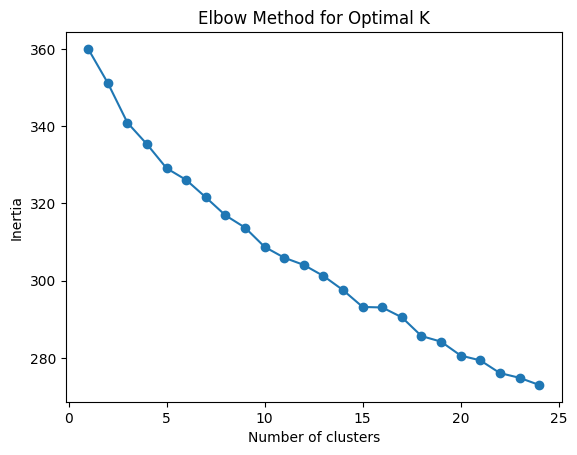

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Perform KMeans with different values of K
inertias = []
for k in range(1, 25):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(tfidf_matrix)
    inertias.append(kmeans.inertia_)

# Plot the elbow method
plt.plot(range(1, 25), inertias, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()


#### 4.1.2 Apply K-Means clustering model and Visualize the distribution

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score: 0.06790663788087366

DataFrame cluster_pdf:
    Document  Cluster
0          1        8
1          2        2
2          3        1
3          4        1
4          5        1
..       ...      ...
384      385        8
385      386        3
386      387        2
387      388       12
388      389        7

[389 rows x 2 columns]
Cluster Distribution:
    Cluster  Count  Percentage
0         1     44   11.311054
1         2    114   29.305913
2         3     49   12.596401
3         4     23    5.912596
4         5      8    2.056555
5         6     25    6.426735
6         7     10    2.570694
7         8     39   10.025707
8         9     20    5.141388
9        10     15    3.856041
10       11     14    3.598972
11       12     28    7.197943


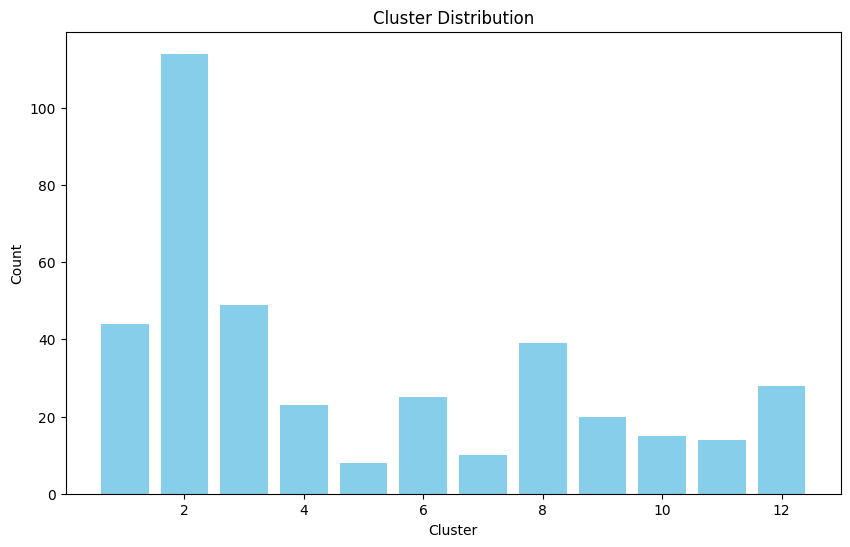

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import pandas as pd

# optimal K as 12 from the Elbow Method
num_clusters = 12

# Assume tfidf_matrix is defined before this point

# Apply K-Means clustering
kmeans = KMeans(n_clusters=num_clusters, init='k-means++', max_iter=300, random_state=42)
cluster_labels = kmeans.fit_predict(tfidf_matrix)

# Evaluate clustering performance using Silhouette Score
silhouette_avg = silhouette_score(tfidf_matrix, cluster_labels)
print(f"Silhouette Score: {silhouette_avg}")

# Create a DataFrame to store cluster labels
cluster_pdf = pd.DataFrame({
    'Document': [str(i + 1) for i in range(len(cluster_labels))],  # Updated to show only the document numbers
    'Cluster': [label + 1 for label in cluster_labels]
})

# Print the resulting DataFrame
print("\nDataFrame cluster_pdf:")
print(cluster_pdf)

# Create a DataFrame with cluster distribution and percentage
cluster_distribution_df = pd.DataFrame({
    'Cluster': range(1, num_clusters + 1),
    'Count': pd.Series(cluster_labels).value_counts().sort_index().values,
    'Percentage': pd.Series(cluster_labels).value_counts(normalize=True).sort_index().values * 100
})

# Print the DataFrame with cluster distribution and percentage
print("Cluster Distribution:")
print(cluster_distribution_df)

# Plot a bar chart for the cluster distribution
plt.figure(figsize=(10, 6))
plt.bar(cluster_distribution_df['Cluster'], cluster_distribution_df['Count'], color='skyblue')
plt.title('Cluster Distribution')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.show()


#### 4.1.3 Find the key words for each cluster

In [ ]:
pip install pyspellchecker

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from spellchecker import SpellChecker


# Number of top key words to extract for each cluster
top_key_words_count = 15

# Get the cluster centers and sort them by the frequency of terms
cluster_centers = kmeans.cluster_centers_.argsort()[:, ::-1]

# Get feature names from the vectorizer
cluster_keywords = tfidf_vectorizer.get_feature_names_out()

# Create a list to store DataFrames for each cluster
dfs = []

for i in range(num_clusters):
    # Get the top N cluster keywords for each cluster
    top_cluster_keywords = [cluster_keywords[index] for index in cluster_centers[i, :top_key_words_count]]

    # Create a DataFrame for each cluster
    cluster_df = pd.DataFrame({'Cluster': [i + 1], 'Cluster Keywords': [', '.join(top_cluster_keywords)]})

    # Append the DataFrame to the list
    dfs.append(cluster_df)

# Concatenate all DataFrames in the list into a single DataFrame
cluster_keywords_df = pd.concat(dfs, ignore_index=True)

# Print the DataFrame with cluster keywords for each cluster
print("\nCluster Keywords for Each Cluster:")
print(cluster_keywords_df)


Cluster Keywords for Each Cluster:
    Cluster                                   Cluster Keywords
0         1  dba, passed, granting, kathleen, application, ...
1         2  city, portland, order, council, ordered, effec...
2         3  shall, city, employee, agreement, employees, y...
3         4  festival, street, shall, park, june, area, cit...
4         5  transfer, defendant, rem, maine, criminal, cur...
5         6  housing, district, city, developer, developmen...
6         7  map, zoning, city, amendment, amended, urban, ...
7         8  city, grant, order, ordered, documents, approp...
8         9  project, mainedot, agreement, shall, municipal...
9        10  donation, parks, facilities, recreation, city,...
10       11  easement, deed, grantor, said, land, feet, mai...
11       12  fiscal, year, school, city, budget, education,...


####4.1.4 Assign Clusters to Interest Categories

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from spellchecker import SpellChecker

# Predefined interests with keywords
interests = {
    'Environmental': {'park', 'lanes', 'docket', 'urban', 'tent', 'parks', 'development', 'land', 'cumberland', 'easement', 'street', 'Lac', 'Municipal'},
    'Safety': {'leave', 'street', 'criminal', 'defendant', 'legislative', 'transfer', 'body', 'currency', 'downtown', 'emergency', 'id', 'dna', 'recorded', 'street', 'debt', 'Effective', 'Approval', 'Officers'},
    'Education': {'class', 'funding',' fund','file','appropriated','appropriating', 'donation','adult', 'donations', 'youth','fees', 'director', 'authorized','book','page', 'fiscal', 'year', 'school', 'budget', 'education', 'appropriation','public','funding','kindergarten', 'schools','committee'},
    'Infrastructure': {'park', 'marathon', 'food', 'program', 'affordable', 'rent', 'housing', 'transportation', 'costs', 'facilities', 'recreation', 'service', 'services', 'deed', 'grant', 'feet', 'hundredths', 'deeds', 'project', 'plan', 'agreement', 'bonds'},
    'Zoning': {'festival', 'plan', 'vendors', 'parking', 'square', 'district', 'rezoning', 'overlay', 'zone', 'zoning', 'residential', 'planning', 'developer', 'rental', 'Map', 'Amended', 'Assembled', 'Ordained', 'Reference', 'Incorporated', 'Height', 'Council'}
}

# Assuming you have already created cluster_keywords_df

# Keywords for each cluster from the DataFrame
clusters_text = cluster_keywords_df['Cluster Keywords'].tolist()

# Vectorize using TF-IDF
vectorizer = TfidfVectorizer()
interests_text = [' '.join(words) for words in interests.values()]

# Calculate cosine similarity
similarity_matrix = cosine_similarity(vectorizer.fit_transform(clusters_text), vectorizer.transform(interests_text))

# Print the similarity scores
print("\nSimilarity Scores:")
for cluster_index, sim_row in enumerate(similarity_matrix):
    print(f"Cluster {cluster_index + 1}:", ", ".join(f"{category}: {score:.4f}" for category, score in zip(interests.keys(), sim_row)))



Similarity Scores:
Cluster 1: Environmental: 0.1426, Safety: 0.1846, Education: 0.0651, Infrastructure: 0.0000, Zoning: 0.0000
Cluster 2: Environmental: 0.0000, Safety: 0.0818, Education: 0.0668, Infrastructure: 0.0000, Zoning: 0.0696
Cluster 3: Environmental: 0.0000, Safety: 0.0813, Education: 0.0000, Infrastructure: 0.1868, Zoning: 0.0692
Cluster 4: Environmental: 0.2490, Safety: 0.0491, Education: 0.0000, Infrastructure: 0.1432, Zoning: 0.2177
Cluster 5: Environmental: 0.0918, Safety: 0.5453, Education: 0.0000, Infrastructure: 0.0000, Zoning: 0.0000
Cluster 6: Environmental: 0.0894, Safety: 0.0000, Education: 0.0475, Infrastructure: 0.3136, Zoning: 0.1342
Cluster 7: Environmental: 0.0885, Safety: 0.0000, Education: 0.0637, Infrastructure: 0.0000, Zoning: 0.6638
Cluster 8: Environmental: 0.0000, Safety: 0.0846, Education: 0.0510, Infrastructure: 0.0710, Zoning: 0.0000
Cluster 9: Environmental: 0.0000, Safety: 0.0000, Education: 0.0000, Infrastructure: 0.3043, Zoning: 0.0000
Cluster 

In [ ]:
# Assign clusters to interest categories based on highest similarity
assigned_clusters = {}
for cluster_index, sim_row in enumerate(similarity_matrix):
    assigned_category = max(range(len(interests)), key=lambda x: sim_row[x])
    assigned_clusters[cluster_index + 1] = list(interests.keys())[assigned_category]

# Create DataFrame
category_df = pd.DataFrame(list(assigned_clusters.items()), columns=['Cluster', 'Interest Category'])

# Print the DataFrame
print("\nAssigned Categories:")
print(category_df)


Assigned Categories:
    Cluster Interest Category
0         1            Safety
1         2            Safety
2         3    Infrastructure
3         4     Environmental
4         5            Safety
5         6    Infrastructure
6         7            Zoning
7         8            Safety
8         9    Infrastructure
9        10         Education
10       11     Environmental
11       12         Education


#### 4.1.5 Merge and Get Documents' Interest Category

In [ ]:
# Merge DataFrames on the 'cluster' column
df_cluster = pd.merge(cluster_pdf, category_df, on='Cluster', how='inner')

# Print the resulting DataFrame
print("\nDataFrame df_cluster:")
print(df_cluster)


DataFrame df_cluster:
    Document  Cluster Interest Category
0          1        8            Safety
1          8        8            Safety
2         19        8            Safety
3         33        8            Safety
4         45        8            Safety
..       ...      ...               ...
384      324        6    Infrastructure
385      325        6    Infrastructure
386      366        6    Infrastructure
387      372        6    Infrastructure
388      373        6    Infrastructure

[389 rows x 3 columns]


In [ ]:
# Assuming 'DocumentNumber' is the column based on which you want to sort the DataFrame
df_cluster_sorted = df_cluster.sort_values(by='Document', ascending=True)

# Display the first 38 rows of the sorted DataFrame
print("\nDataFrame df_cluster_sorted:")
print(df_cluster_sorted.head(38))


DataFrame df_cluster_sorted:
     Document  Cluster        Interest
0           1        8          Safety
39          2        2          Safety
153         3        1          Safety
154         4        1          Safety
155         5        1          Safety
156         6        1          Safety
197         7        9  Infrastructure
1           8        8          Safety
198         9        9  Infrastructure
217        10       12       Education
218        11       12       Education
219        12       12       Education
220        13       12       Education
245        14        4   Environmental
40         15        2          Safety
41         16        2          Safety
42         17        2          Safety
43         18        2          Safety
2          19        8          Safety
268        20        7          Zoning
269        21        7          Zoning
44         22        2          Safety
278        23        3  Infrastructure
246        24        4   Environme

### **4.2 Model2 :LDA (Get a dateframe df_lda)**
The LDA model will give a set of topics, where each topic is represented as a distribution over words. Inspect the topics and their top words to interpret the categories

#### 4.2.1 Finding Optimal Number of Topics for LDA

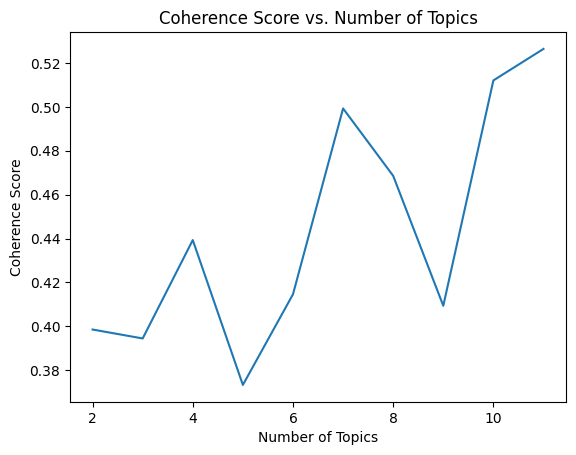

In [ ]:
from gensim.models import CoherenceModel
from gensim.corpora import Dictionary
from gensim.models import LdaModel
import matplotlib.pyplot as plt

#'cleaned_texts' is a list of tokenized texts
dictionary = Dictionary(cleaned_texts)
corpus = [dictionary.doc2bow(text) for text in cleaned_texts]

# Calculate coherence scores to find a optimal number of topics
coherence_scores = []
for num_topics in range(2, 12):  # You can adjust the range
    lda_model = LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=10)  # Increase the 'passes' parameter
    coherence_model = CoherenceModel(model=lda_model, texts=cleaned_texts, dictionary=dictionary, coherence='c_v')
    coherence_score = coherence_model.get_coherence()
    coherence_scores.append(coherence_score)

# Plot the coherence scores
plt.plot(range(2, 12), coherence_scores)
plt.xlabel('Number of Topics')
plt.ylabel('Coherence Score')
plt.title('Coherence Score vs. Number of Topics')
plt.show()



#### **Inference**: According to the coherrence score plot , 8 is the optimal topic number

#### 4.2.2 Train an LDA model and Assign Documents to A Topic

In [ ]:
from gensim.models import CoherenceModel
from gensim.corpora import Dictionary
from gensim.models import LdaModel
import matplotlib.pyplot as plt
from sklearn.decomposition import LatentDirichletAllocation

# train an LDA model with 8 topics
n_topics = 8

# Instantiate and fit the LDA model
lda = LatentDirichletAllocation(n_components=n_topics, random_state=42)
lda.fit(tfidf_matrix)

# Transform the TF-IDF matrix to get the topic distribution for each document
lda_topic_matrix = lda.transform(tfidf_matrix)

# Assign each document to the topic with the highest probability
assigned_topics = lda_topic_matrix.argmax(axis=1) + 1  # Adding 1 to make topics start from 1

# Create a DataFrame to store document-topic assignments
df_topic = pd.DataFrame({
    'Document': [str(i + 1) for i in range(len(assigned_topics))],  # Document numbers
    'Topic': assigned_topics
})

# Print the resulting DataFrame
print("\nDataFrame topic_assignment_df:")
print(df_topic)


DataFrame topic_assignment_df:
    Document  Topic
0          1      3
1          2      3
2          3      2
3          4      6
4          5      2
..       ...    ...
384      385      3
385      386      3
386      387      1
387      388      3
388      389      3

[389 rows x 2 columns]


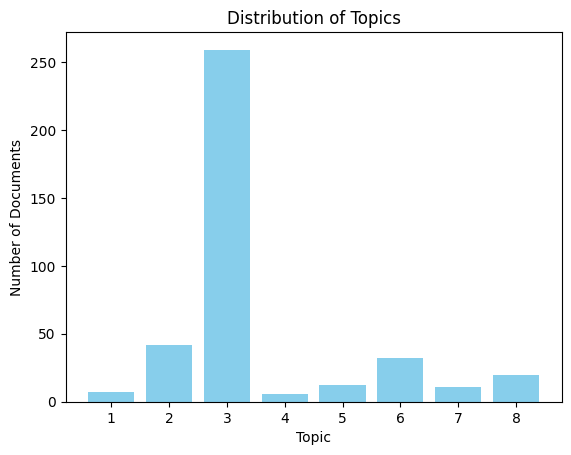

In [ ]:
import matplotlib.pyplot as plt

# Count the occurrences of each topic
topic_distribution = df_topic['Topic'].value_counts()

# Plot the bar chart
plt.bar(topic_distribution.index, topic_distribution.values, color='skyblue')
plt.xlabel('Topic')
plt.ylabel('Number of Documents')
plt.title('Distribution of Topics')
plt.show()


#### 4.2.3 Display LDA Topics and Their Key Words

In [ ]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Create a TF-IDF vectorizer and fit it to text data with bigrams
vectorizer = TfidfVectorizer(ngram_range=(1, 2))
tfidf_matrix = vectorizer.fit_transform([" ".join(tokens) for tokens in cleaned_texts])
tfidf_feature_names = vectorizer.get_feature_names_out()

# Define the number of topics
num_topics = min(8, tfidf_matrix.shape[1])

# Adjust other parameters of LDA model
lda = LatentDirichletAllocation(n_components=num_topics, random_state=42, learning_method='batch', max_iter=20)
topic_distributions = lda.fit_transform(tfidf_matrix)

# Display the topics horizontally
def display_topics(model, feature_names, num_top_words):
    stop_words = ENGLISH_STOP_WORDS.union(["appr", "appr opria", "opria ted", "opria", "substantially whatever", "ron farr", "appr opriated", "opriated", "dba", "fse", "class fse", "rem", "rem namely", "constable calendar", "duties make", "brownfields", "code august", "proposed amendments", "hearing citizen", "amendment placed", "said amendment", "upon november", "hearing attached", "item", "pi", "item pi", "time opening", "pursuant polls", "open close", "close tuesday", "order june", "zoning map", "file department", "amended file", "department planning", "incorporated reference", "development incorporated", "follows zoning", "amendment specifically", "portland dated", "portland", "city portland", "city council", "portland city", "maine", "pf", "hundredths", "hundredths feet", "side line", "casablanca tours", "elisa marr", "lambert"])

    for topic_idx, topic in enumerate(model.components_):
        top_words = [feature_names[i] for i in topic.argsort()[:-num_top_words - 1:-1] if feature_names[i] not in stop_words]
        print(f"Topic {topic_idx + 1}: {', '.join(top_words)}")

# Adjust the number of top words based on the number of features
num_top_words = min(10, len(tfidf_feature_names))
display_topics(lda, tfidf_feature_names, num_top_words)


Topic 1: remote methods, remote, methods, geno, remote participation, elisa, marr, harbor hotel, rachel millette
Topic 2: officers approval, granting municipal, order passed, municipal officers, order granting, granting, passed, application class, llc dba
Topic 3: city, order, shall, street, council, ordered, agreement
Topic 4: amended extended, empire, dock fore, dock, caring community, tipped, protection waste, diversion grant, waste diversion, diversion
Topic 5: transfer, defendant, defendant rem, currency, criminal, docket, approval transfer
Topic 6: june order, year appropriation, municipal election, polls, education kindergarten, kindergarten grade, kindergarten, portland board
Topic 7: constable, appointed constable, midnight december, firearm concealed, carry firearm, concealed, allowed carry, firearm
Topic 8: awar, faa, protection agency, mayor pro, non resident, boards committees, feder, feder al, federal aviation


#### 4.2.4 Calculate Jaccard Similarity Score to Find the Interest Category for Topics

In [ ]:
# Predefined interests with keywords
interests = {
    'Environmental': {'fish exchange','protection waste', 'diversion grant', 'waste diversion', 'dock fore', 'dock', 'caring community','diversion', 'portland fish', 'parks conservancy', 'conservancy', 'iswg','sustainability', 'conservation','emission','Renewable Energy','Biodiversity','Climate Change', 'Greenhouse', 'Gas','polution','Natural Resource'},
    'Safety': {'wrecker','transfer', 'defendant', 'defendant rem', 'criminal','approval transfer' ,'constable', 'ordered appointment', 'special plan','Tobacco','appointed constable', 'midnight december', 'carry firearm', 'firearm concealed','safety', 'security', 'accident','eliminating','carry firearm','criminal', 'emergency', 'hazard', 'risk', 'secure', 'concealed', 'midnight','passage','defendant'},
    'Education': {'remote methods', 'remote', 'application class', 'llc dba','methods', 'geno', 'remote participation','service program', 'remote methods', 'adult education', 'education', 'public education','adult education','learning', 'school', 'teaching', 'knowledge', 'students', 'public education', 'year appropriation', 'appropriation','polls', 'kindergarten grade', 'education kindergarten', 'kindergarten'},
    'Infrastructure': {'wrecker','map city','protection agency','boards committees','Cables', 'Maine Power','Grantor','street','faa','cables', 'maine power','West commercial','assembly facilities','facilities division','ships', 'cruise ships', 'service reserve', 'miranda group', 'burrows application' },
  'Zoning': {'amendment zoning','map city', 'resident','Land Grantor','Height Overlay','Grantor','festival', 'vendors', 'festival area', 'marathon', 'Pride Portland','Portland Board', 'area shall', 'zoning','festival area','regulation','facilities division','planning','zoning change','reference zoning', 'zoning laws', 'building codes', 'rezoning', 'land development','land use','map','overlay','zone','amended'}
}

# Helper function to calculate Jaccard similarity
def calculate_jaccard_similarity(set1, set2):
    intersection = len(set1.intersection(set2))
    union = len(set1.union(set2))
    return intersection / union if union != 0 else 0.0

# Calculate Jaccard similarity between topic keywords and predefined interests
similarity_scores = {}
assigned_topics = []  # Define assigned_topics
topic_scores = []    # Define topic_scores

for topic_idx, topic_keywords in enumerate(lda.components_):
    topic_keywords_set = set([tfidf_feature_names[i] for i in topic_keywords.argsort()[:-num_top_words - 1:-1]])
    scores = {}
    for interest, interest_keywords in interests.items():
        interest_keywords_set = set(interest_keywords)
        jaccard_similarity = calculate_jaccard_similarity(topic_keywords_set, interest_keywords_set)
        scores[interest] = jaccard_similarity
    similarity_scores[topic_idx + 1] = scores

    # Assigning topics based on the highest score
    assigned_topic = max(scores, key=scores.get)
    assigned_score = scores[assigned_topic]

    assigned_topics.append(assigned_topic)
    topic_scores.append(assigned_score)

# Set a threshold for the Jaccard Similarity Scores
threshold = 0.03

# Assign the predefined interest with the highest score to each topic, considering the threshold
topic_interests = {}
for topic_idx, scores in similarity_scores.items():
    assigned_interest = max(scores, key=scores.get) if max(scores.values()) > threshold else "Uncategorized"
    topic_interests[topic_idx] = assigned_interest

# Create a DataFrame
df_category = pd.DataFrame(list(topic_interests.items()), columns=['Topic', 'Interest'])

# Print the DataFrame
print("\nDataFrame df_category:")
print(df_category)



DataFrame df_category:
   Topic        Interest
0      1       Education
1      2       Education
2      3  Infrastructure
3      4   Environmental
4      5          Safety
5      6       Education
6      7          Safety
7      8  Infrastructure


#### 4.2.5 Merge tables to Get Documents' Interest Category as df_lda



In [ ]:
# Merge the DataFrames on the 'Topic' column
df_lda = pd.merge(df_topic, df_category, on='Topic')

# Print the new DataFrame
print("\nDataFrame df_order:")
print(df_lda)


DataFrame df_order:
    Document  Topic        Interest
0          1      3  Infrastructure
1          2      3  Infrastructure
2          7      3  Infrastructure
3          8      3  Infrastructure
4          9      3  Infrastructure
..       ...    ...             ...
384      211      7          Safety
385      285      7          Safety
386      289      7          Safety
387      321      7          Safety
388      348      7          Safety

[389 rows x 3 columns]


In [ ]:
# Assuming 'DocumentNumber' is the column based on which you want to sort the DataFrame
df_lda_sorted = df_lda.sort_values(by='Document', ascending=True)

# Display the first 38 rows of the sorted DataFrame
print("\nDataFrame df_cluster_sorted:")
print(df_lda_sorted.head(38))


DataFrame df_cluster_sorted:
     Document  Topic        Interest
0           1      3  Infrastructure
1           2      3  Infrastructure
259         3      2       Education
301         4      6       Education
260         5      2       Education
261         6      2       Education
2           7      3  Infrastructure
3           8      3  Infrastructure
4           9      3  Infrastructure
302        10      6       Education
303        11      6       Education
304        12      6       Education
305        13      6       Education
262        14      2       Education
5          15      3  Infrastructure
333        16      4   Environmental
339        17      1       Education
346        18      8  Infrastructure
6          19      3  Infrastructure
7          20      3  Infrastructure
8          21      3  Infrastructure
340        22      1       Education
9          23      3  Infrastructure
10         24      3  Infrastructure
11         25      3  Infrastructure
12      

## 5.Find the Location (Address) for each PDF

In [ ]:
pip install fuzzywuzzy

In [ ]:
import spacy
import pandas as pd
from fuzzywuzzy import process

# Load the spaCy language model
nlp = spacy.load('en_core_web_sm')

# List of predefined areas
predefined_areas = [
    "West End",
    "Parkside",
    "East Bayside",
    "East End",
    "Bayside",
    "Deering",
    "Munjoy Hill",
    "Back Cove",
    "Old Port",
    "Highlands"]

#  'pdf_texts' is a list containing the content of each PDF
data = []

for i, text in enumerate(pdf_texts):
    doc = nlp(text)

    # Extract entities of type 'GPE' (Geopolitical Entity, includes locations)
    addresses = [ent.text for ent in doc.ents if ent.label_ == 'GPE']

    # Initialize variables to keep track of the best match
    best_match = None
    best_score = 0

    # Iterate through individual addresses and find the best match for the PDF
    for address in addresses:
        current_match, score = process.extractOne(address, predefined_areas)
        if score > best_score:
            best_match = current_match
            best_score = score

    # Append data for the current PDF to the list
    data.append({
        'Document': i + 1,
        'Address': best_match,
        'Score': best_score
    })

# Create a DataFrame from the list
df_address = pd.DataFrame(data)

# Display the processed data
print(df_address)


/usr/local/lib/python3.10/dist-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


     Document      Address  Score
0           1  Munjoy Hill     47
1           2     West End    100
2           3         None      0
3           4     West End     68
4           5  Munjoy Hill     43
..        ...          ...    ...
384       385     Old Port     68
385       386     Old Port     68
386       387     Old Port     68
387       388     Old Port     56
388       389     Old Port     68

[389 rows x 3 columns]


## 6.Policy Prediction Using Two Models

### 6.1 Model 1 - K-means Prediction

####  6.1.1 Merge df_address with df_cluster to get the address, interest category of pdf

In [ ]:
# Convert 'Document' column to int64 in df_cluster
df_cluster['Document'] = df_cluster['Document'].astype('int64')

# Rename 'Interest Category' to 'Interest' in df_cluster
df_cluster = df_cluster.rename(columns={'Interest Category': 'Interest'})

# Perform the merge
df_cluster_merge = pd.merge(df_cluster, df_address, on='Document', how='inner')

# Drop one of the 'Cluster', 'Score' columns
df_cluster_merge = df_cluster_merge.drop(columns=['Cluster', 'Score'])

# Display df_cluster_merge
print(df_cluster_merge)


     Document        Interest      Address
0           1          Safety  Munjoy Hill
1           8          Safety         None
2          19          Safety         None
3          33          Safety     East End
4          45          Safety     Old Port
..        ...             ...          ...
384       324  Infrastructure         None
385       325  Infrastructure     Old Port
386       366  Infrastructure     Old Port
387       372  Infrastructure  Munjoy Hill
388       373  Infrastructure      Bayside

[389 rows x 3 columns]


####  6.1.2 Cluster_prediction :Merge df1 and df_cluster to Predict Most Beneficial Policy

In [ ]:
# Convert 'Document' column to integers in df_cluster_merge
df_cluster_merge['Document'] = df_cluster_merge['Document'].astype('int64')

# Merge the two DataFrames based on the "Interest" and "Address" columns
cluster_prediction = pd.merge(df1, df_cluster_merge, on=['Interest', 'Address'], how='left')

# Display the updated DataFrame with 'Document' formatted as integers
with pd.option_context('display.float_format', '{:.0f}'.format):
    print(cluster_prediction)

      Person       Address  AGE        Interest  Document
0          1      West End   25   Environmental       210
1          1      West End   25   Environmental       258
2          1      West End   25   Environmental       374
3          1      West End   25   Environmental       177
4          1      West End   25   Environmental       178
...      ...           ...  ...             ...       ...
2945     499       Deering   26  Infrastructure       307
2946     499       Deering   26  Infrastructure       365
2947     499       Deering   26  Infrastructure       378
2948     499       Deering   26  Infrastructure       176
2949     500  East Bayside   32       Education       NaN

[2950 rows x 5 columns]


#### 6.1.3 Create Plots for The Cluster Prediction Distribution

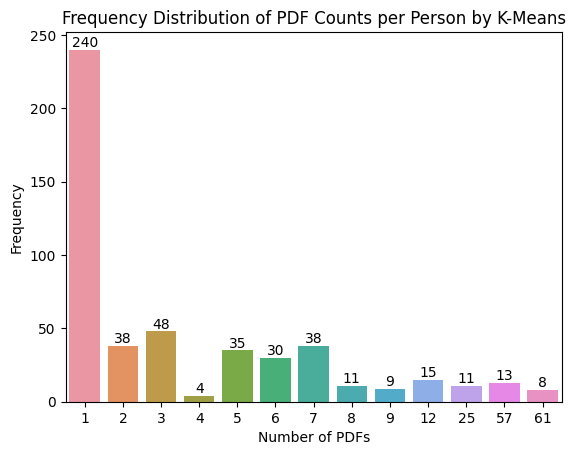

In [ ]:
import matplotlib.pyplot as plt

# Count the occurrences of each 'Person'
pdf_counts = cluster_prediction['Person'].value_counts()

# Create a countplot
ax = sns.countplot(x=pdf_counts.values)

# Add number annotations on top of each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

# Set plot labels and title
plt.title('Frequency Distribution of PDF Counts per Person by K-Means')
plt.xlabel('Number of PDFs')
plt.ylabel('Frequency')

# Display the plot
plt.show()

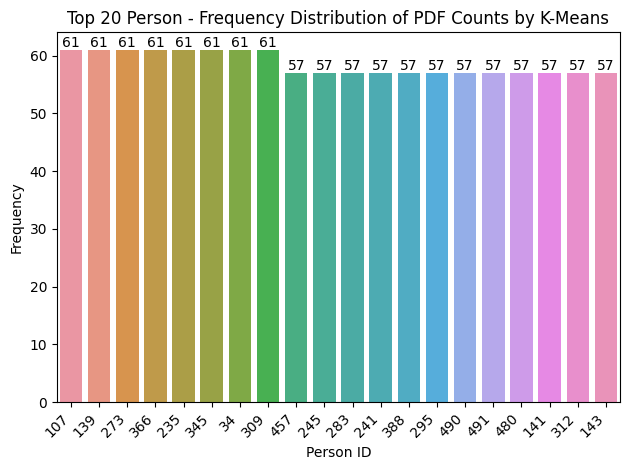

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the number of top person IDs to display
top_n = 20

# Count the occurrences of each 'Person'
pdf_counts_by_person = cluster_prediction['Person'].value_counts()

# Select the top N person IDs
top_person_ids = pdf_counts_by_person.head(top_n).index

# Filter the DataFrame for the top person IDs
filtered_df = cluster_prediction[cluster_prediction['Person'].isin(top_person_ids)]

# Create a countplot
ax = sns.countplot(x='Person', data=filtered_df, order=top_person_ids)

# Add number annotations on top of each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

# Set plot labels and title
plt.title(f'Top {top_n} Person - Frequency Distribution of PDF Counts by K-Means')
plt.xlabel('Person ID')
plt.ylabel('Frequency')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.tight_layout()  # Adjust layout for better spacing
plt.show()


### 6.2 Model 2 - LDA Prediction
#### 6.2.1 Merge df_address with df_lda to Get the Address, Interest category for PDFs

In [ ]:
print(df_lda)
print(df_address)

    Document  Topic        Interest
0          1      3  Infrastructure
1          2      3  Infrastructure
2          7      3  Infrastructure
3          8      3  Infrastructure
4          9      3  Infrastructure
..       ...    ...             ...
384      211      7          Safety
385      285      7          Safety
386      289      7          Safety
387      321      7          Safety
388      348      7          Safety

[389 rows x 3 columns]
     Document      Address  Score
0           1  Munjoy Hill     47
1           2     West End    100
2           3         None      0
3           4     West End     68
4           5  Munjoy Hill     43
..        ...          ...    ...
384       385     Old Port     68
385       386     Old Port     68
386       387     Old Port     68
387       388     Old Port     56
388       389     Old Port     68

[389 rows x 3 columns]


In [ ]:
# Convert 'Document' column to int64 in df_lda
df_lda['Document'] = df_lda['Document'].astype('int64')

# Perform the merge
df_lda_merge = pd.merge(df_lda, df_address, on='Document', how='inner')

# Drop one of the 'Cluster', 'Score' columns
df_lda_merge = df_lda_merge.drop(columns=['Topic', 'Score'])

# Display df_cluster_merge
print(df_lda_merge)


     Document        Interest       Address
0           1  Infrastructure   Munjoy Hill
1           2  Infrastructure      West End
2           7  Infrastructure      Old Port
3           8  Infrastructure          None
4           9  Infrastructure      Old Port
..        ...             ...           ...
384       211          Safety   Munjoy Hill
385       285          Safety  East Bayside
386       289          Safety          None
387       321          Safety          None
388       348          Safety          None

[389 rows x 3 columns]


#### 6.2.2 LDA_Prediction :Merge df1 and df_lda to Predict Most Beneficial Policy

In [ ]:
print(df1)

     Person       Address  AGE        Interest
0         1      West End   25   Environmental
1         2      Parkside   49          Safety
2         3  East Bayside   26       Education
3         4  East Bayside   24          Safety
4         5      East End   36          Safety
..      ...           ...  ...             ...
495     496     Back Cove   48       Education
496     497  East Bayside   36          Zoning
497     498     Back Cove   41          Zoning
498     499       Deering   26  Infrastructure
499     500  East Bayside   32       Education

[500 rows x 4 columns]


In [ ]:
# Convert 'Document' column to integers in df_lda_merge
df_lda_merge['Document'] = df_lda_merge['Document'].astype('int64')

# Merge the two DataFrames based on the "Interest" and "Address" columns
lda_prediction = pd.merge(df1, df_lda_merge, on=['Interest', 'Address'], how='left')

# Display the updated DataFrame with 'Document' formatted as integers
with pd.option_context('display.float_format', '{:.0f}'.format):
    print(lda_prediction)

      Person       Address  AGE        Interest  Document
0          1      West End   25   Environmental       NaN
1          2      Parkside   49          Safety       168
2          3  East Bayside   26       Education       113
3          4  East Bayside   24          Safety       108
4          4  East Bayside   24          Safety       285
...      ...           ...  ...             ...       ...
2645     499       Deering   26  Infrastructure       307
2646     499       Deering   26  Infrastructure       350
2647     499       Deering   26  Infrastructure       365
2648     499       Deering   26  Infrastructure       378
2649     500  East Bayside   32       Education       113

[2650 rows x 5 columns]


#### 6.2.3 Create Plots for The LDA Prediction Distribution

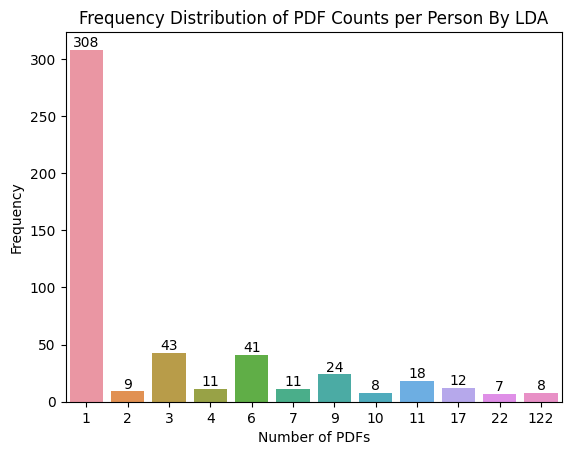

In [ ]:
import matplotlib.pyplot as plt

# Count the occurrences of each 'Person'
pdf_counts = lda_prediction['Person'].value_counts()

# Create a countplot
ax = sns.countplot(x=pdf_counts.values)

# Add number annotations on top of each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

# Set plot labels and title
plt.title('Frequency Distribution of PDF Counts per Person By LDA')
plt.xlabel('Number of PDFs')
plt.ylabel('Frequency')

# Display the plot
plt.show()

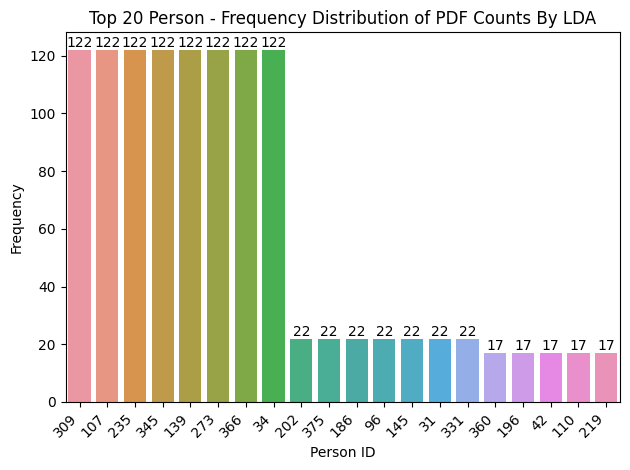

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the number of top person IDs to display
top_n = 20

# Count the occurrences of each 'Person'
pdf_counts_by_person = lda_prediction['Person'].value_counts()

# Select the top N person IDs
top_person_ids = pdf_counts_by_person.head(top_n).index

# Filter the DataFrame for the top person IDs
filtered_df = lda_prediction[lda_prediction['Person'].isin(top_person_ids)]

# Create a countplot
ax = sns.countplot(x='Person', data=filtered_df, order=top_person_ids)

# Add number annotations on top of each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

# Set plot labels and title
plt.title(f'Top {top_n} Person - Frequency Distribution of PDF Counts By LDA')
plt.xlabel('Person ID')
plt.ylabel('Frequency')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.tight_layout()  # Adjust layout for better spacing
plt.show()


# Conclusion

In summary, this project utilized two datasets from the sponsor to predict optimal policies for individuals.

We employed various techniques, including data collection, preprocessing, text mining (TF-IDF, NER, topic modeling), and methods like K-Means clustering and LDA modeling. The outcome was a successful prediction of the best policy for individuals, establishing a foundational recommendation system for the Election Bridge platform.

Upon verification of 38 interest results, cluster prediction achieved 16 correct outcomes, while LDA prediction yielded 15 correct results, resulting in accuracy rates of 40% and 39.47%, respectively. Both models demonstrated relatively low accuracy, with a minimal difference between them.

Our experiments highlighted the significance of keywords in interest classification accuracy.

To enhance precision, further optimization is needed, involving the calibration of interest classification keywords and continuous consultation with domain experts for model refinement and improved recommendation accuracy.



# Reference

[1] [Comparison] Natural Language Processing vs Text Mining. (2018, December 31). Sloboda Studio. https://sloboda-studio.com/blog/natural-language-processing-vs-text-mining

[2] Kleinberg, J., Ludwig, J., Mullainathan, S., & Obermeyer, Z. (2015). Prediction Policy Problems. American Economic Review, 105(5), 491–495. https://doi.org/10.1257/aer.p20151023

[3] Python Extract Text From PDF (Developer Tutorial) | IronPDF for Python. (n.d.). Ironpdf.com. Retrieved November 20, 2023, from Python Extract Text From PDF (Developer Tutorial) | IronPDF for Python

[4] Find all locations / cities / places in a text. (n.d.). Stack Overflow. Retrieved November 20, 2023, from https://stackoverflow.com/questions/30150047/find-all-locations-cities-places-in-a-text‌

[5] Recommendation System in Python. (n.d.). Www.linkedin.com. Retrieved November 20, 2023, from https://www.linkedin.com/pulse/recommendation-system-python-amit-kumar

[6] Machine Learning with an Amazon like Recommendation Engine. (2021, August 17). Python for Engineers. https://new.pythonforengineers.com/blog/machine-learning-with-an-amazon-like-recommendation-engine


